#Task 2 : MOVIE RATING PREDICTION WITH PYTHON

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df=pd.read_csv("IMDb Movies India.csv",encoding="latin1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [51]:
df.drop_duplicates(inplace=True)
df.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [52]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,5659.0,5.898533,1.381165,1.1,5.0,6.1,6.9,10.0


In [53]:
df.describe(include="object")

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659,5659,5659,5659,5659
unique,5385,91,174,376,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,90,41,104,52,57


In [54]:
print("Year")
print(df["Year"].unique())

Year
['(2019)' '(1997)' '(2005)' '(2012)' '(2014)' '(2004)' '(2016)' '(1991)'
 '(2018)' '(2010)' '(1958)' '(2021)' '(2017)' '(2009)' '(1993)' '(2002)'
 '(2008)' '(1994)' '(2007)' '(2003)' '(1998)' '(1979)' '(1974)' '(2015)'
 '(2006)' '(1981)' '(2020)' '(1985)' '(2013)' '(2011)' '(1988)' '(1987)'
 '(1999)' '(1973)' '(1968)' '(1982)' '(1977)' '(1950)' '(1969)' '(1948)'
 '(1990)' '(1989)' '(2001)' '(2000)' '(1953)' '(1978)' '(1963)' '(1992)'
 '(1976)' '(1984)' '(1986)' '(1966)' '(1975)' '(1980)' '(1967)' '(1970)'
 '(1952)' '(1972)' '(1971)' '(1964)' '(1954)' '(1962)' '(1957)' '(1965)'
 '(1996)' '(1995)' '(1956)' '(1955)' '(1936)' '(1983)' '(1951)' '(1961)'
 '(1959)' '(1949)' '(1960)' '(1946)' '(1940)' '(1945)' '(1938)' '(1941)'
 '(1942)' '(1935)' '(1937)' '(1947)' '(1931)' '(1933)' '(1943)' '(1944)'
 '(1932)' '(1939)' '(1934)']


In [55]:
print("Duration")
print(df["Duration"].unique())

Duration
['109 min' '110 min' '147 min' '142 min' '82 min' '116 min' '96 min'
 '120 min' '161 min' '166 min' '102 min' '87 min' '132 min' '105 min'
 '146 min' '168 min' '158 min' '126 min' '94 min' '138 min' '124 min'
 '144 min' '157 min' '136 min' '107 min' '113 min' '80 min' '122 min'
 '149 min' '148 min' '130 min' '121 min' '188 min' '115 min' '103 min'
 '114 min' '170 min' '100 min' '99 min' '140 min' '128 min' '93 min'
 '125 min' '145 min' '75 min' '111 min' '134 min' '104 min' '92 min'
 '137 min' '127 min' '119 min' '135 min' '90 min' '150 min' '151 min'
 '95 min' '112 min' '143 min' '177 min' '117 min' '123 min' '72 min'
 '154 min' '175 min' '153 min' '78 min' '139 min' '133 min' '180 min'
 '46 min' '164 min' '162 min' '171 min' '160 min' '152 min' '163 min'
 '165 min' '141 min' '129 min' '156 min' '240 min' '172 min' '88 min'
 '155 min' '167 min' '106 min' '193 min' '108 min' '195 min' '174 min'
 '81 min' '178 min' '58 min' '184 min' '97 min' '176 min' '169 min'
 '131 min' '77 

In [56]:
print("Votes")
print(df["Votes"].unique())

Votes
['8' '35' '827' ... '70,344' '408' '1,496']


In [57]:
df["Year"]=df["Year"].str.strip("()").astype(int)
df["Duration"]=df["Duration"].str.replace(" min","").astype(int)
df["Votes"]=df["Votes"].str.replace(",","").astype(int)
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

# Exploratory data analysis (EDA)

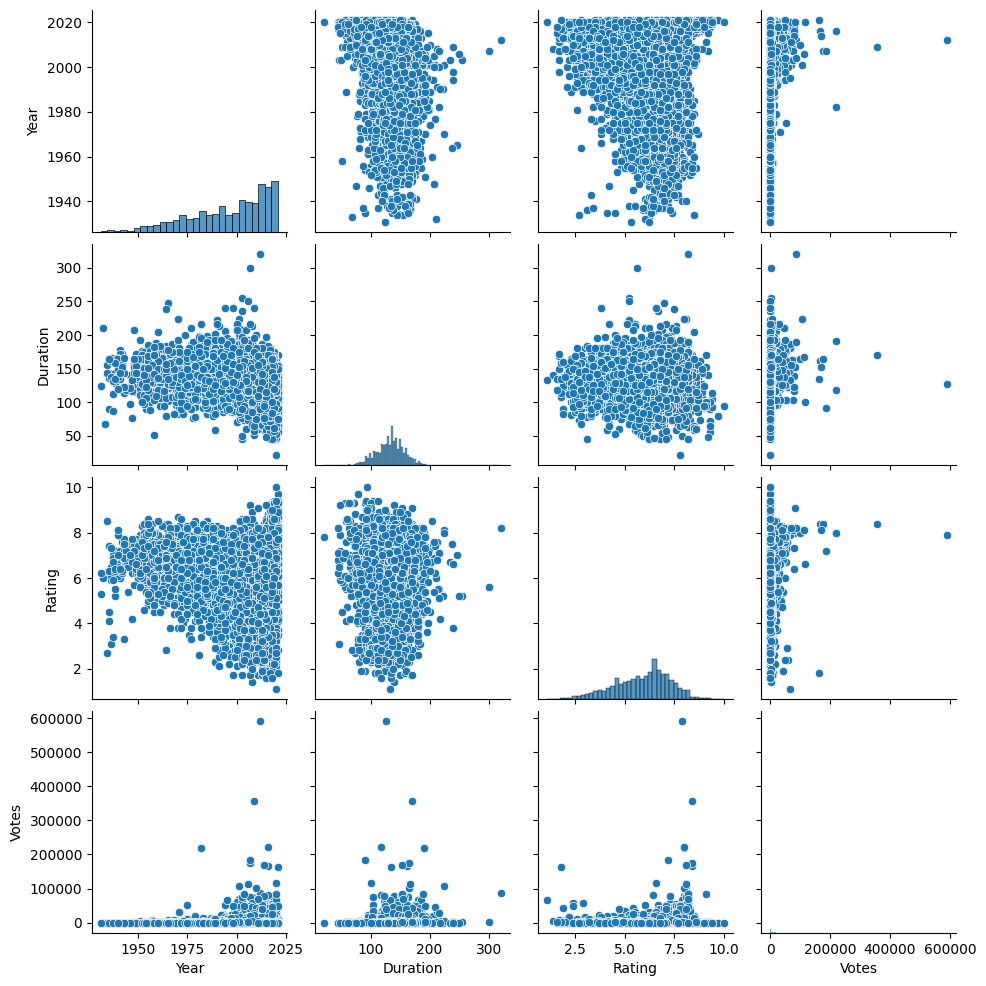

In [58]:
sns.pairplot(df)

<ipython-input-59-fa5e5921ff35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Year"])


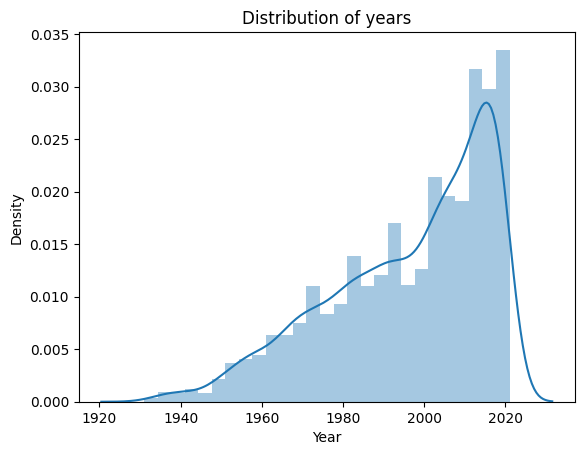

In [59]:
sns.distplot(df["Year"])
plt.title("Distribution of years")
plt.show()

<ipython-input-60-278a9b336095>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rating"])


Text(0.5, 1.0, 'Distribution of movie ratings')

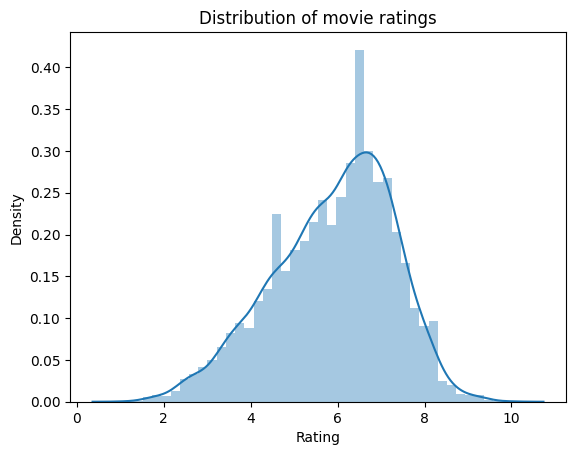

In [60]:
sns.distplot(df["Rating"])
plt.title("Distribution of movie ratings")

Text(0.5, 1.0, 'does duration affects the rating')

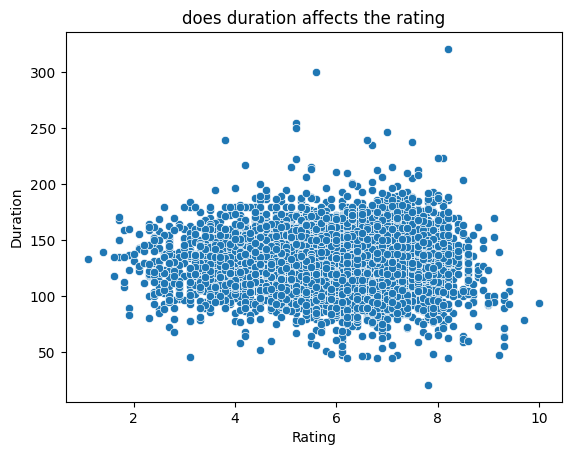

In [61]:
sns.scatterplot(y="Duration",x="Rating",data=df)
plt.title("does duration affects the rating")

Text(0.5, 1.0, 'how votes affects the rating')

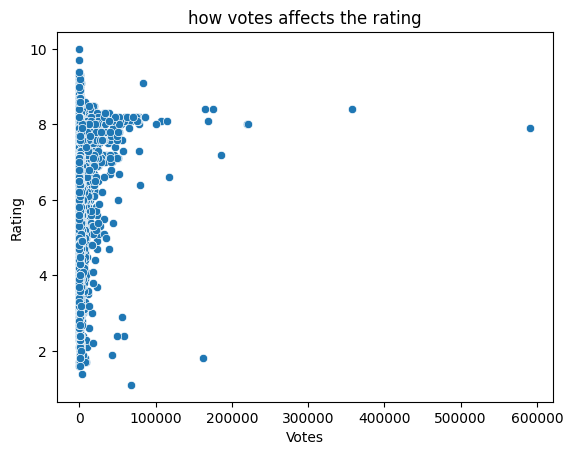

In [62]:
sns.scatterplot(x="Votes",y="Rating",data=df)
plt.title("how votes affects the rating")

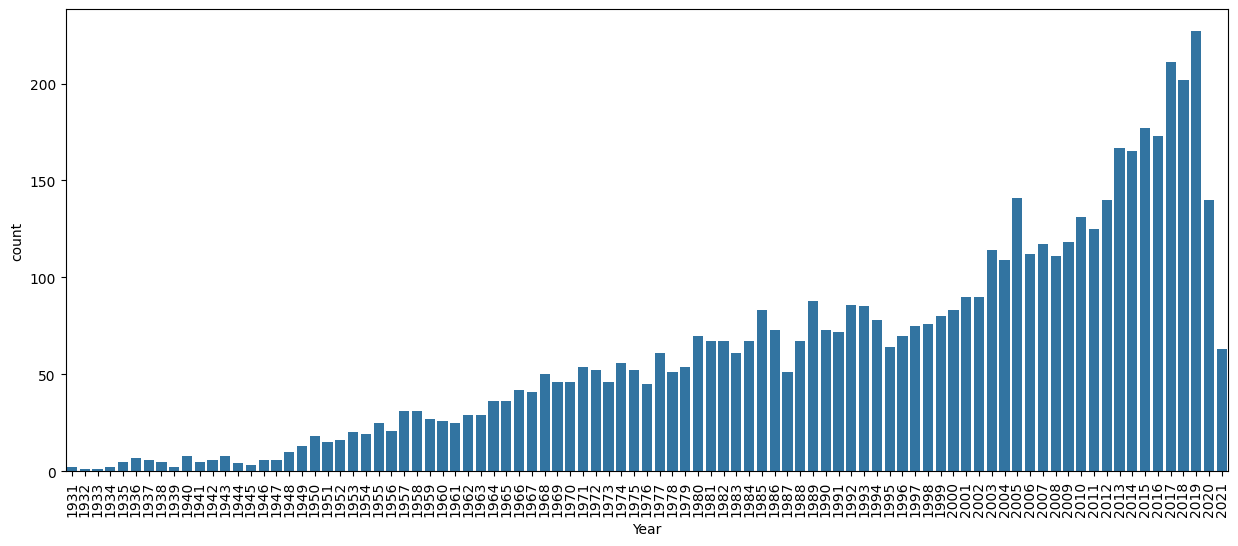

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(x=df["Year"])
plt.xticks(rotation=90)
plt.show()

In [64]:
top_20=df[["Name","Genre","Rating"]].sort_values(by="Rating",ascending=False).head(20)
print("TOP_20 based on ratings")
top_20

TOP_20 based on ratings


,Name,Genre,Rating
8339,Love Qubool Hai,"Drama, Romance",10.0
5410,Half Songs,"Music, Romance",9.7
6852,June,Drama,9.4
14222,The Reluctant Crime,Drama,9.4
5077,Gho Gho Rani,"History, Romance",9.4
1314,Ashok Vatika,Drama,9.3
13231,Sindhustan,"Documentary, Family, History",9.3
8344,Love Sorries,"Comedy, Drama, Romance",9.3
12673,Secrets of Sinauli,"Documentary, History",9.3
11843,Refl3ct,Sci-Fi,9.3


In [65]:
top_20=df[["Name","Genre","Votes"]].sort_values(by="Votes",ascending=False).head(20)
print("TOP_20 based on votes")
top_20

TOP_20 based on votes


,Name,Genre,Votes
8219,Life of Pi,"Adventure, Drama, Fantasy",591417
75,3 Idiots,"Comedy, Drama",357889
8233,Lion,"Biography, Drama",220526
4848,Gandhi,"Biography, Drama, History",220118
14038,The Darjeeling Limited,"Adventure, Comedy, Drama",185127
8228,Like Stars on Earth,"Drama, Family",175810
10882,PK,"Comedy, Drama, Musical",168150
3410,Dangal,"Action, Biography, Drama",165074
11463,Radhe,"Action, Crime, Thriller",162455
3829,Dil Bechara,"Comedy, Drama, Romance",117377


Text(0.5, 1.0, 'Director with no of movies ')

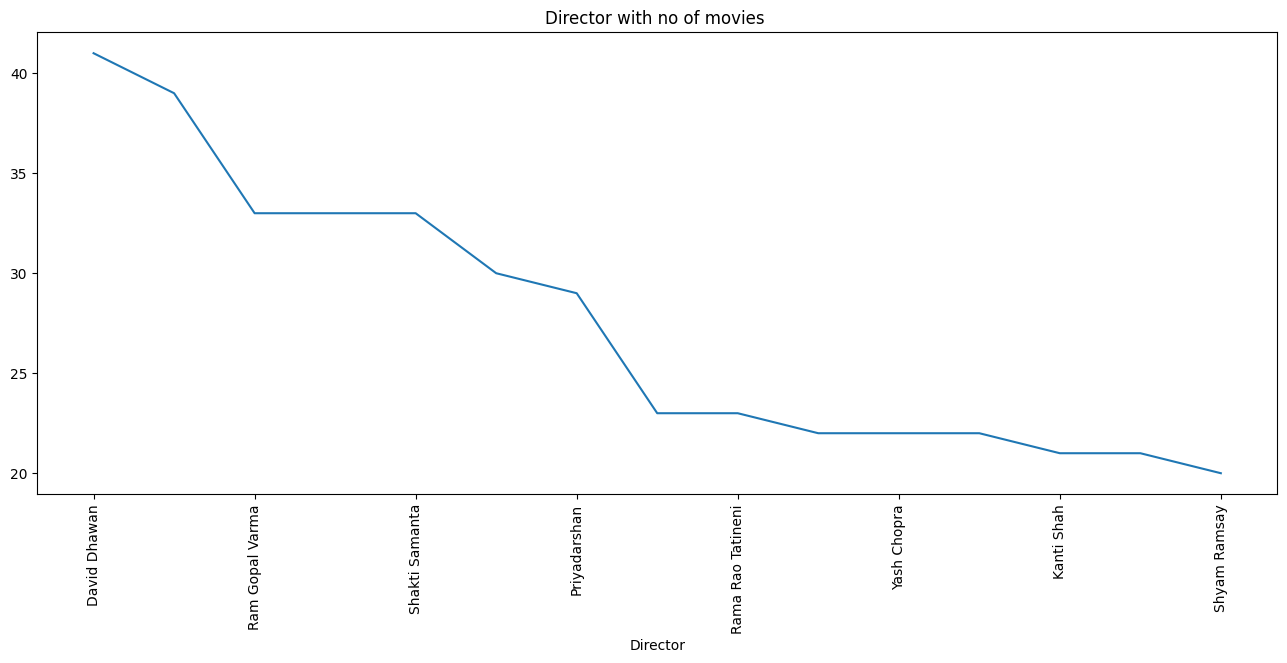

In [66]:
plt.figure(figsize=(16,6))
di=df["Director"].value_counts(ascending=False)[:15].plot(kind="line")
plt.xticks(rotation=90)
plt.title("Director with no of movies ")


Text(0.5, 1.0, 'Popular Actor ')

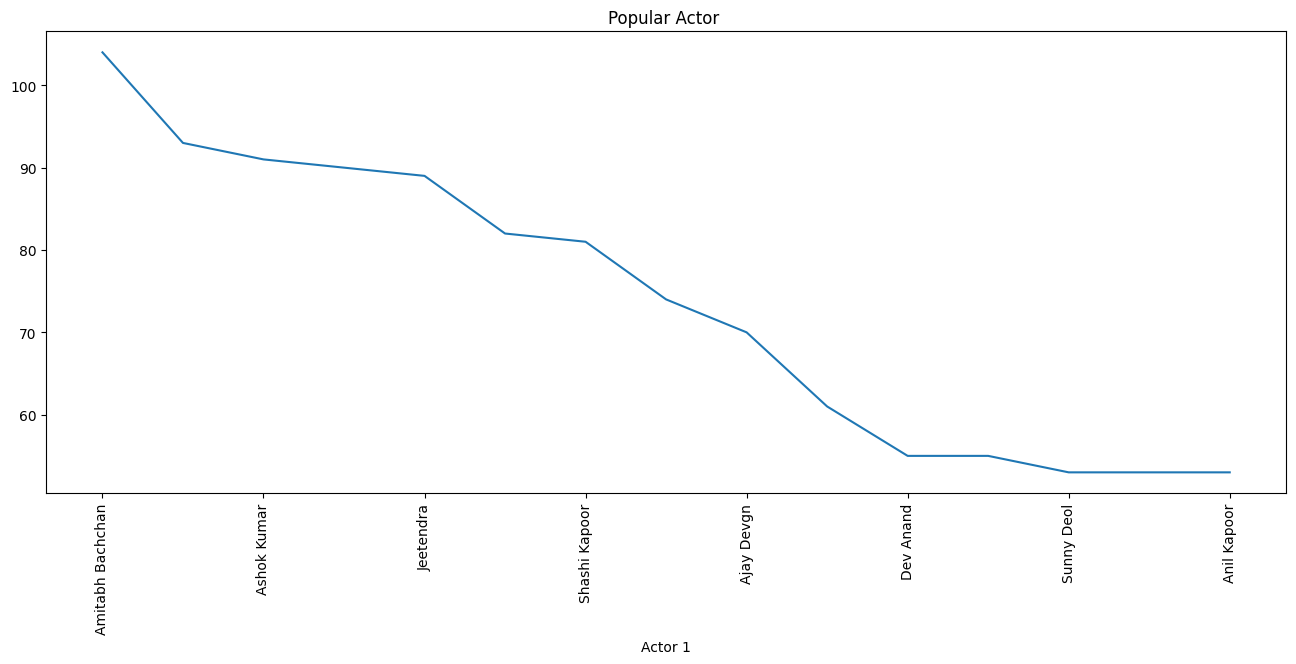

In [67]:
plt.figure(figsize=(16,6))
Ac=df["Actor 1"].value_counts(ascending=False)[:15].plot(kind="line")
plt.xticks(rotation=90)
plt.title("Popular Actor ")

In [68]:
df[["Actor 1","Year","Rating","Votes"]].sort_values(by="Votes",ascending=False).head(20)

,Actor 1,Year,Rating,Votes
8219,Suraj Sharma,2012,7.9,591417
75,Aamir Khan,2009,8.4,357889
8233,Dev Patel,2016,8.0,220526
4848,Ben Kingsley,1982,8.0,220118
14038,Owen Wilson,2007,7.2,185127
8228,Amole Gupte,2007,8.4,175810
10882,Aamir Khan,2014,8.1,168150
3410,Aamir Khan,2016,8.4,165074
11463,Salman Khan,2021,1.8,162455
3829,Sushant Singh Rajput,2020,6.6,117377


In [69]:
df.nunique()

Name        5385
Year          91
Duration     174
Genre        376
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64

In [70]:
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)


<Axes: >

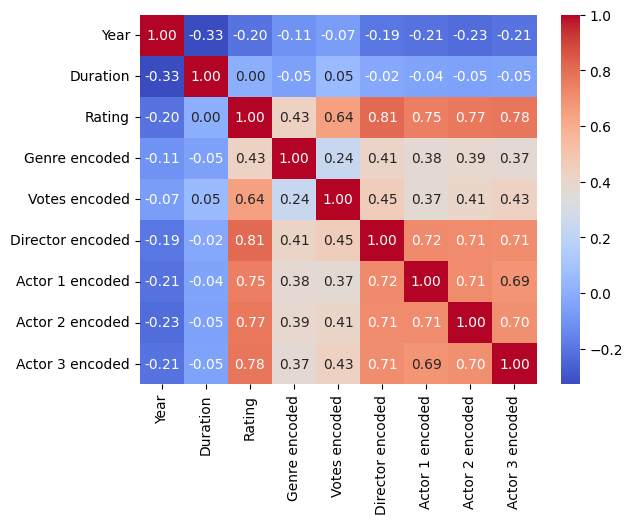

In [71]:
df.drop("Name",axis=1,inplace=True)
sns.heatmap(df.corr(),cmap="coolwarm",fmt=".2f",annot=True)

In [72]:
df.drop("Duration",axis=1,inplace=True)
x=df.drop("Rating",axis=1)
y=df["Rating"]

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#LinearRegression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [75]:
model=LinearRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [76]:
mse=mean_squared_error(y_pred,y_test)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

In [77]:
print("MSE FOR LR")
print(mse)

MSE FOR LR
0.30098026389557164


In [78]:
print("R2_SCORE FOR LR")
print(r2_score)

R2_SCORE FOR LR
0.8483174887613154


#DecisionTreeRegressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
model=DecisionTreeRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [81]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

In [82]:
print("MSE FOR DTR")
print(mse)

MSE FOR DTR
0.4884982332155477


In [83]:
print("R2_SCORE FOR DTR")
print(r2_score)

R2_SCORE FOR DTR
0.7538156230220348


#Support Vector Regressor (SVR)

In [84]:
from sklearn.svm import SVR

In [85]:
model=SVR().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [86]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

In [87]:
print("MSE FOR SVR")
print(mse)

MSE FOR SVR
1.9305496592636984


In [88]:
print("R2_SCORE FOR SVR")
print(r2_score)

R2_SCORE FOR SVR
0.0270770029967633


#RandomForestRegressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
model=RandomForestRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [91]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

In [92]:
print("MSE FOR RFR")
print(mse)

MSE FOR RFR
0.2359118136042402


In [93]:
print("R2_SCORE FOR RFR")
print(r2_score)

R2_SCORE FOR RFR
0.8811094925121763


#GradientBoostingRegressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
model=GradientBoostingRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [97]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

In [98]:
print("MSE FOR GBR")
print(mse)

MSE FOR GBR
0.2576770684091723


In [99]:
print("R2_SCORE FOR GBR")
print(r2_score)

R2_SCORE FOR GBR
0.8701406387281042


#AdaBoostRegressor

In [100]:
from sklearn.ensemble import AdaBoostRegressor

In [101]:
model=AdaBoostRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [102]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

In [103]:
print("MSE FOR ABR")
print(mse)

MSE FOR ABR
0.37980342818940704


In [104]:
print("R2_SCORE FOR ABR")
print(r2_score)

R2_SCORE FOR ABR
0.8085936366086153


#XGBRegressor

In [105]:
from xgboost import XGBRegressor

In [106]:
model=XGBRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [107]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

In [108]:
print("MSE FOR XGBR")
print(mse)

MSE FOR XGBR
0.258221986480761


In [109]:
print("R2_SCORE FOR XGBR")
print(r2_score)

R2_SCORE FOR XGBR
0.8698660209161316
